In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Train_Total', 'Percent'])
missing_data.head(20)

,Train_Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Test_Total', 'Percent'])
missing_data.head(20)

,Test_Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [7]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


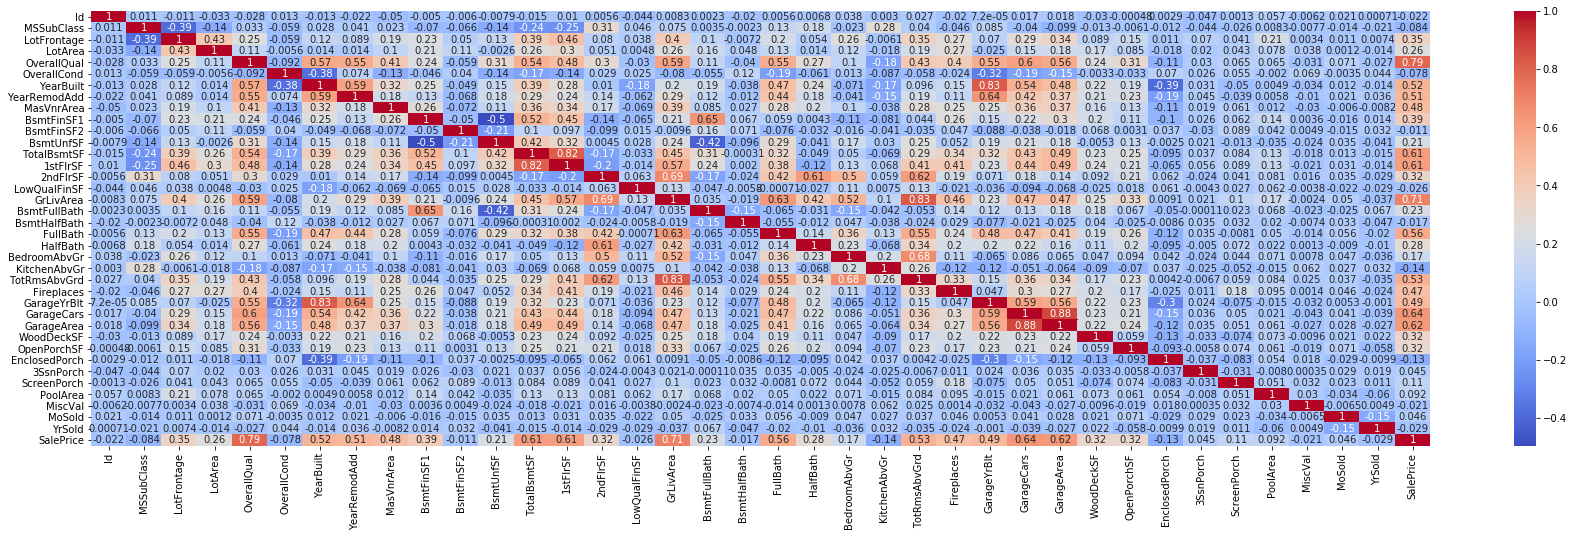

In [8]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [9]:
corr = train.corr()

In [10]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [11]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

Droped some columns that less than 0.3 of correlation of Sale Prices.

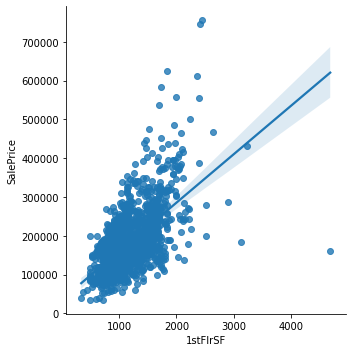

In [12]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

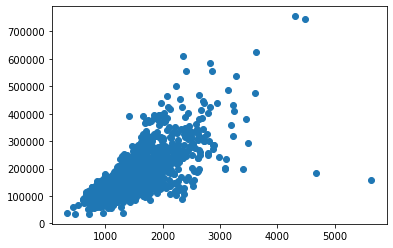

In [13]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

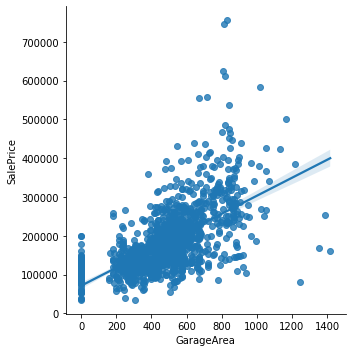

In [14]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

## Feature Engineering

converting all columns into numeric or categorical data.

In [15]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
2ndFlrSF,0,0.000000
OverallQual,0,0.000000


Some of paremeters have a lot of missing values. That's why we should drop these from data. And we are going to drop parematers which total value is larger than 81.

In [16]:
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [17]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000


In [18]:
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [19]:
categorical_train = []
for column in train:
    if train[column].dtype == 'object':
        categorical_train.append(column)
categorical_train

[]

In [20]:
categorical_test = []
for column in test:
    if test[column].dtype == 'object':
        categorical_train.append(column)
categorical_test

[]

In [21]:
train.isnull().sum().sort_values(ascending=False).head(5)

GarageYrBlt    81
MasVnrArea      8
SalePrice       0
2ndFlrSF        0
YearBuilt       0
dtype: int64

In [22]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [23]:
test.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
GarageArea       1
GarageCars       1
BsmtFinSF1       1
TotalBsmtSF      1
OpenPorchSF      0
1stFlrSF         0
YearBuilt        0
YearRemodAdd     0
dtype: int64

In [24]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

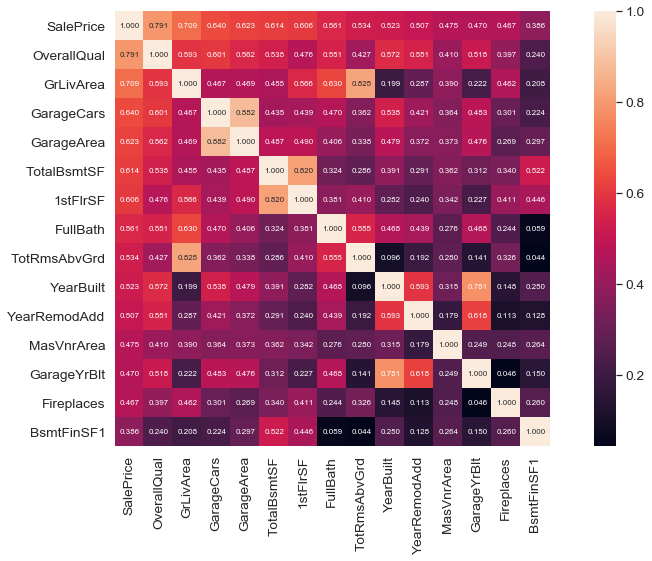

In [25]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
train = train[cols]

In [27]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [28]:
test=test[cols.drop('SalePrice')]

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3,
                                                    random_state=101)

In [30]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [33]:
print(lm.intercept_)

[6.60022817e-17]


In [34]:
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


In [35]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

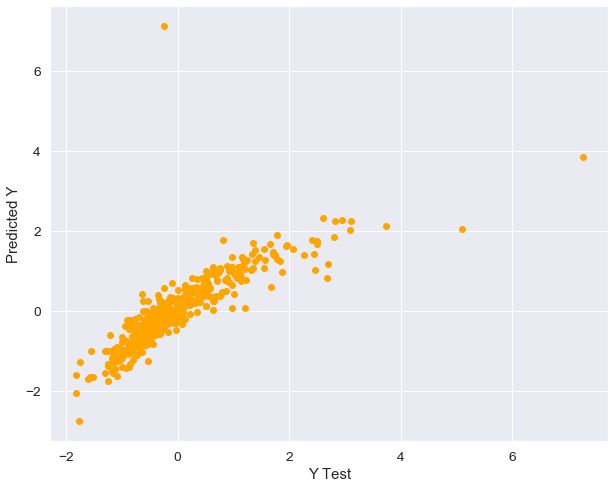

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions,c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

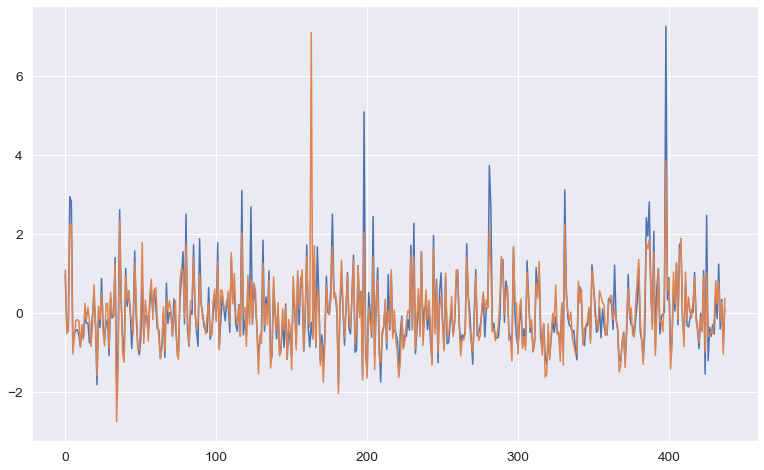

In [37]:
plt.figure(figsize=(13,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.29105407971784336
MSE: 0.29995756024517595
RMSE: 0.5476838141164808


## Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [41]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


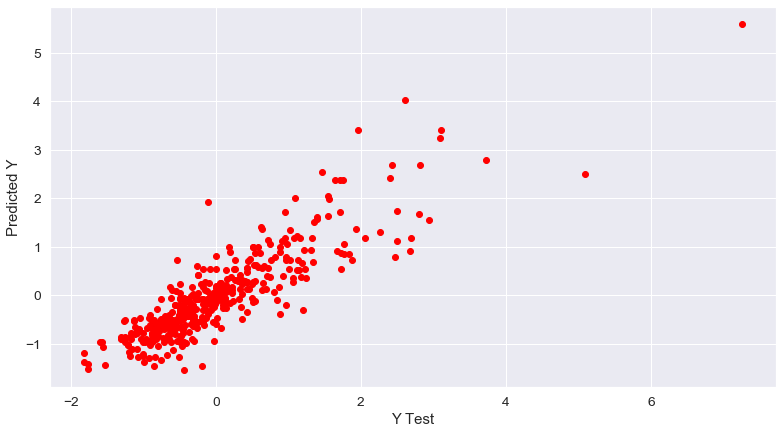

In [43]:
plt.figure(figsize=(13,7))
plt.scatter(y_test,dtr_pred,c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [45]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.23592827927432142
MSE: 0.15184249281601425
RMSE: 0.38966972273454126


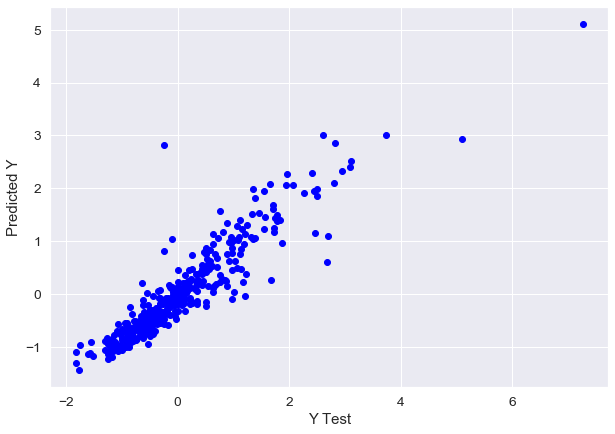

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,rfr_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Ada Boost

In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators=100, learning_rate=0.01, random_state=123)

In [50]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=8,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [51]:
ada_pred = ada_model.predict(X_test)
ada_predictions = predictions.reshape(-1,1)

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, ada_pred))
print('MSE:', metrics.mean_squared_error(y_test, ada_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ada_pred)))

MAE: 0.241368970879679
MSE: 0.13897669477083494
RMSE: 0.3727957815893776


## XG Boost

In [53]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
xgb_pred=classifier.predict(X_test)
xgb_pred=xgb_pred.reshape(-1,1)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 0.23989146390705018
MSE: 0.13092891995683037
RMSE: 0.3618410147521013


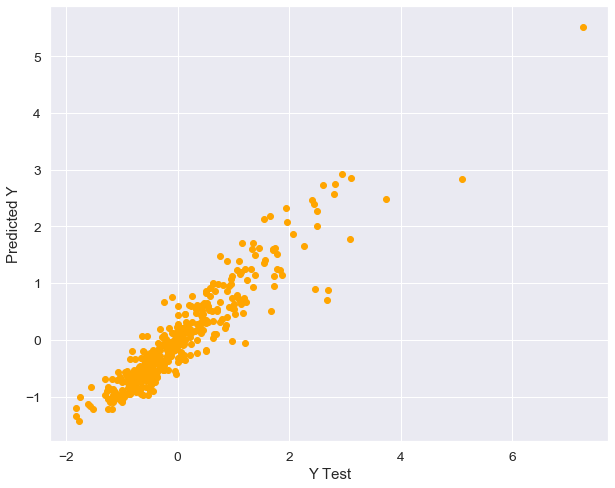

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,xgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Extra Tree Regressor

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

In [58]:
extra_model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, bootstrap=True, random_state=123)
extra_model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [59]:
Ex_pred= extra_model.predict(X_test)

In [60]:
Ex_pred=Ex_pred.reshape(-1,1)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, Ex_pred))
print('MSE:', metrics.mean_squared_error(y_test, Ex_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Ex_pred)))

MAE: 0.24033689295678004
MSE: 0.14954352238816587
RMSE: 0.38670857552964333


In [62]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),
                     metrics.mean_squared_error(y_test, ada_pred),metrics.mean_squared_error(y_test, dtr_pred),
                     metrics.mean_squared_error(y_test, xgb_pred),metrics.mean_squared_error(y_test, rfr_pred),
                     metrics.mean_squared_error(y_test, Ex_pred)])


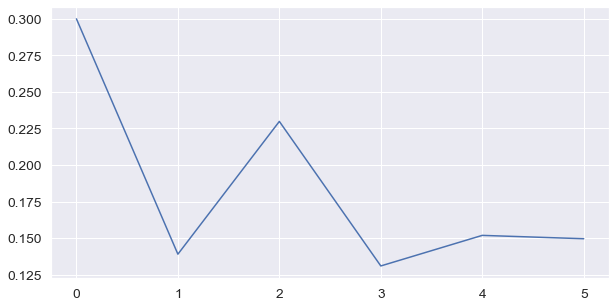

In [63]:
plt.figure(figsize=(10,5))
plt.plot(error_rate)

In [64]:
t=pd.read_csv('test.csv')

In [65]:
test_id = t['Id']
t= pd.DataFrame(test_id, columns=['Id'])

In [66]:
test = sc_X.fit_transform(test)

In [67]:
test_prediction_xgb=classifier.predict(test)
test_prediction_xgb= test_prediction_xgb.reshape(-1,1)

In [68]:
test_prediction_xgb

array([[-0.7527863 ],
       [-0.22412187],
       [-0.08748132],
       ...,
       [-0.24544257],
       [-0.8999071 ],
       [ 0.5617612 ]], dtype=float32)

In [69]:
test_prediction_xgb=sc_y.inverse_transform(test_prediction_xgb)

In [70]:
test_prediction_xgb = pd.DataFrame(test_prediction_xgb, columns=['SalePrice'])

In [71]:
test_prediction_xgb.head()

,SalePrice
0,119600.703125
1,161538.265625
2,172377.609375
3,175775.093750
4,220063.687500


In [72]:
final_result= pd.concat([t,test_prediction_xgb], axis=1)

In [73]:
final_result.head()

,Id,SalePrice
0,1461,119600.703125
1,1462,161538.265625
2,1463,172377.609375
3,1464,175775.093750
4,1465,220063.687500


In [74]:
final_result.to_csv('submission.csv',index=False)